In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from sklearn.linear_model import Ridge,Lasso,LinearRegression
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score,mean_squared_error


In [43]:
df=pd.read_csv('data\\stud.csv')
df.head(3)


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [44]:
x=df.drop(columns=['math_score'],axis=1)
y=df['math_score']


In [45]:
num_features=x.select_dtypes(exclude='object').columns
categorical_features=x.select_dtypes(include='object').columns

In [46]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

#  applying standard scaling to numerical values
numeric_transformer=StandardScaler()
# applying onehotencoding to categorical values
oh_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(

    [
        ("OneHotEncoder",oh_transformer,categorical_features),
        ("StandardScaler",numeric_transformer,num_features)
    ]
)

In [47]:
x=preprocessor.fit_transform(x)

**Seperate training and test data**

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)


(800, 19) (200, 19) (800,) (200,)


**Define Evalute Function**


In [49]:
def evalute_model(true,pred):
    mae=mean_absolute_error(true,pred)
    mse=mean_squared_error(true,pred)
    rmse=root_mean_squared_error(true,pred)
    rs=r2_score(true,pred)

    return mae,mse,rmse,rs

**Define all the models w'll use**

In [50]:
models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    "KNeighborsRegressor":KNeighborsRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    'XGBRegressor':XGBRegressor(),
    'AdaBoostRegressor':AdaBoostRegressor(),
    'CatBoostRegressor':CatBoostRegressor(),
    'SVR':SVR()
}

In [51]:
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,Y_train) 

    # make predictions
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    model_train_mae,model_train_mse,model_train_rmse,model_train_rs=evalute_model(Y_train,y_train_pred)

    model_test_mae,model_test_mse,model_test_rmse,model_test_rs=evalute_model(Y_test,y_test_pred)

    
    print(list(models.keys())[i])

    model_list.append(list(models.keys())[i])

    print('*'*50)
    print('MODEL PERFORMANCE ON TRAINING DATA \n\n')
    print(f"root_mean_squared_error{model_train_rmse}")
    print(f"mean_squared_error{model_train_mse}")
    print(f"r2_score{model_train_rs}")
    print(f"mean_absolute_error{model_train_mae}")

    r2_list.append(model_train_rs)

    print('*'*100)
    print('\n')


    print('MODEL PERFORMANCE ON TEST DATA \n\n')
    print(f"root_mean_squared_error{model_test_rmse}")
    print(f"mean_squared_error{model_test_mse}")
    print(f"r2_score{model_test_rs}")
    print(f"mean_absolute_error{model_test_mae}")

    r2_list.append(model_test_rs)
    print('*'*50)






LinearRegression
**************************************************
MODEL PERFORMANCE ON TRAINING DATA 


root_mean_squared_error5.323050852720514
mean_squared_error28.33487038064859
r2_score0.8743172040139593
mean_absolute_error4.266711846071957
****************************************************************************************************


MODEL PERFORMANCE ON TEST DATA 


root_mean_squared_error5.393993869732843
mean_squared_error29.095169866715487
r2_score0.8804332983749565
mean_absolute_error4.21476314247485
**************************************************
Lasso
**************************************************
MODEL PERFORMANCE ON TRAINING DATA 


root_mean_squared_error6.593815587795566
mean_squared_error43.47840400585579
r2_score0.8071462015863456
mean_absolute_error5.206302661246526
****************************************************************************************************


MODEL PERFORMANCE ON TEST DATA 


root_mean_squared_error6.519694535667419
mean_squar

In [52]:
print(model_list)
print(r2_list)

['LinearRegression', 'Lasso', 'Ridge', 'KNeighborsRegressor', 'DecisionTreeRegressor', 'RandomForestRegressor', 'XGBRegressor', 'AdaBoostRegressor', 'CatBoostRegressor', 'SVR']
[0.8743172040139593, 0.8804332983749565, 0.8071462015863456, 0.8253197323627853, 0.8743042615212909, 0.8805931485028737, 0.8554978341651085, 0.7838129945787431, 0.9996534669718089, 0.7378753209522213, 0.9766581520678299, 0.8480313768352585, 0.9954995512962341, 0.8277965784072876, 0.8463139783775564, 0.8472590387034332, 0.9589358676277713, 0.8516318920747058, 0.8081281585902299, 0.7286001513223705]


R2 SCORE FOR LINEAR MODEL IS BEST 

SELECTING LINEAR MODEL

In [53]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train,Y_train)
y_pred=lin_model.predict(X_test)

score=r2_score(Y_test,y_pred)
print('Accuracy of the model is ',score)

Accuracy of the model is  0.8804332983749565


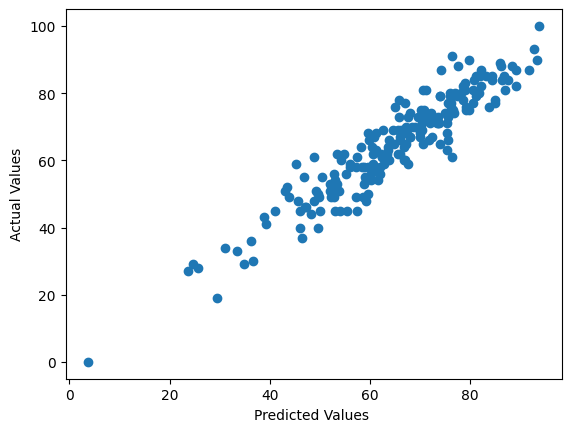

In [54]:
plt.scatter(y_pred,Y_test)
plt.xlabel('Predicted Values ')
plt.ylabel('Actual Values')
plt.show()

<Axes: xlabel='math_score'>

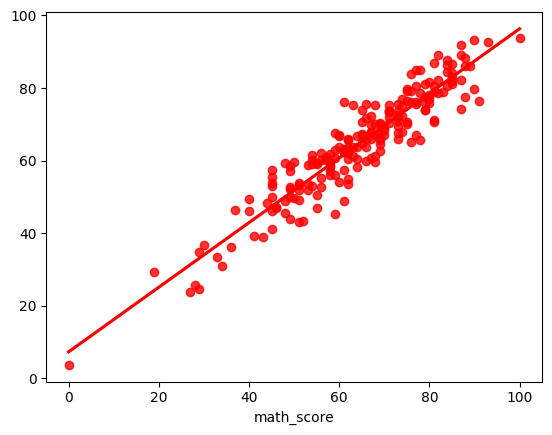

In [55]:
sns.regplot(x=Y_test,y=y_pred,ci=None,color='red')


In [56]:
pred_df=pd.DataFrame({'Actual Value':Y_test,'Predicted Value':y_pred,'Difference':Y_test-y_pred})
pred_df.tail(10)

,Actual Value,Predicted Value,Difference
948,49,52.725000,-3.725000
829,68,61.192956,6.807044
656,77,66.975391,10.024609
199,78,65.700592,12.299408
213,60,54.116204,5.883796
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
78,61,62.345132,-1.345132
